In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data)
df_ride = pd.read_csv(ride_data)

# Combine the data into a single dataset
combine = pd.merge(df_ride,df_city,on = "city", how = "outer")
# Display the data table for preview
combine.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

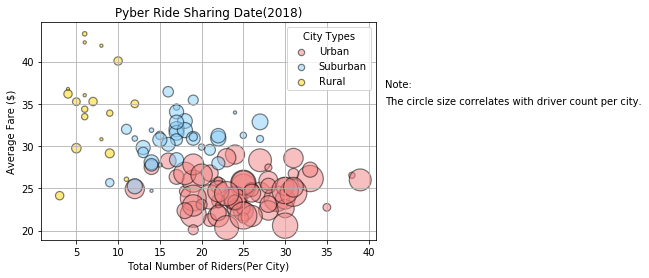

In [8]:
# Obtain the x and y coordinates for each of the three city types
combine_city= combine.groupby(["city","type"])
avg_fare = combine_city ["fare"].mean()
total_number = combine_city["city"].count()
total_driver = combine_city["driver_count"].mean()

df= pd.DataFrame({"average fare": avg_fare,
                  "total rider":total_number,
                  "total driver":total_driver})

df=df.reset_index()
df_urban = df.loc[df["type"] == "Urban",:]
df_rural = df.loc[df["type"] == "Rural",:]
df_suburban=df.loc[df["type"] == "Suburban",:]

# Build the scatter plots for each city types

ax = df_urban.plot(kind = "scatter",
                   x = "total rider",
                   y ="average fare", 
                   c ='lightcoral',
                   s = df_urban["total driver"]*10 , 
                   grid = True,
                   label = "Urban",
                   edgecolors="black",
                   alpha =.5,
                   linewidths =1.2)

ax1=df_suburban.plot(kind = "scatter",
                     x = "total rider",
                     y ="average fare",
                     c ='lightskyblue',
                     alpha=.5,
                     edgecolors="black",
                     linewidths =1.2,
                     s = df_suburban["total driver"]*10  ,
                     grid = True, 
                     title = "Pyber Ride Sharing Date(2018)",
                     label = "Suburban", 
                     ax=ax)

ax2=df_rural.plot(kind = "scatter",
                  x = "total rider",
                  y ="average fare",
                  c ='Gold',
                  alpha= .5,
                  edgecolors="black",
                  linewidths =1.2,
                  s = df_rural["total driver"]*10  , 
                  grid = True, label ='Rural',
                  ax=ax)

# Incorporate the other graph properties
ax.set_xlabel("Total Number of Riders(Per City)")
ax.set_ylabel("Average Fare ($)")

# Create a legend

legend = plt.legend(title = "City Types")
for handles in legend.legendHandles:
    handles.set_sizes([40])
    
# Incorporate a text label regarding circle size
ax.text(42,37,"Note:")
ax.text(42,35,"The circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyber Ride sharing Bubble Plot.png")

## Total Fares by City Type

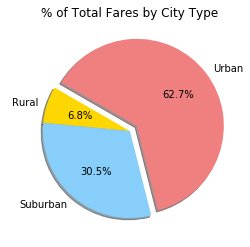

In [9]:
# Calculate Type Percents
combine_type= combine.groupby(["type"])
total_fare = combine_type ["fare"].sum()
df_1 = pd.DataFrame({"Total Fare":total_fare})

# Build Pie Chart

colors = [ "Gold", 
          "lightskyblue",
          "lightcoral"]

explode = (0, 0, 0.1)

df_1.plot(kind = "pie",
          y=df_1.keys(),
          explode=explode,
          colors=colors,
          autopct="%1.1f%%",
          startangle=150, 
          title ="% of Total Fares by City Type",
          legend= False,shadow=True)

plt.axis('off')

# Save Figure
plt.savefig("% of Total Fares by City Type - Pie Chart.png")

## Total Rides by City Type

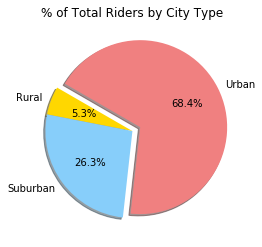

In [10]:
# Calculate Ride Percents
total_rider = combine_type["ride_id"].count()
df_2 = pd.DataFrame({"Total Rider":total_rider})
# Build Pie Chart
colors = [ "Gold", 
          "lightskyblue",
          "lightcoral"]

explode = (0, 0, 0.1)

df_2.plot(kind = "pie",
          y=df_2.keys(),
          explode=explode,
          colors=colors,
          autopct="%1.1f%%",
          startangle=150, 
          title ="% of Total Riders by City Type",
          legend= False,
          shadow=True)

plt.axis('off')

# Save Figure
plt.savefig("% of Total Riders by City Type - Pie Chart")

## Total Drivers by City Type

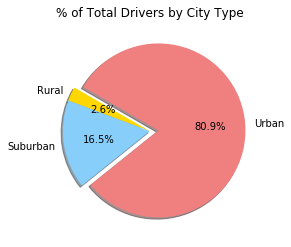

In [11]:
# Calculate Driver Percents
df_type = df.groupby("type")
total_drivers = df_type["total driver"].sum()
df_3 = pd.DataFrame({"Total Drivers":total_drivers})

# Build Pie Charts
pie_chart3 = df_3.plot(kind = "pie",
                       y=df_3.keys(),
                       explode=explode,
                       colors=colors,
                       autopct="%1.1f%%",
                       startangle=150, 
                       title ="% of Total Drivers by City Type",
                       legend= False,
                       shadow=True)
plt.axis('off')

# Save Figure
plt.savefig("% of Total Drivers by City Type - Pie Chart")